# Labor 1 Sprachsignale plotten, laden und erzeugen

## Imports

### Erklärung der Biblioteken 

  numpy 
 - kurz für `Numerical Python` ist eine Bibliothek für wissenschaftliches Rechnen in Python. Sie bietet Unterstützung für große, mehrdimensionale Arrays und Matrizen sowie eine große Sammlung mathematischer Funktionen, um an diesen Arrays Operationen durchzuführen. NumPy wird verwendet, um Audiodaten als Arrays zu laden und zu manipulieren z.B. das Berechnen von Fourier-Transformationen

 scipy.io.wavfile
 - ein Modul in der SciPy-Bibliothek, eine Bibliothek, die häufig für wissenschaftliche und technische Berechnungen verwendet wird. Der Untermodul `scipy.io.wavfile` ermöglicht das Lesen und Schreiben von WAV-Dateien. WAV-Dateien sind ein Format für Audiodateien, das Roh-Audiodaten speichert. Um zu verarbeiten und zu analysieren. Die Funktion `wavfile.read` lädt eine WAV-Datei und gibt die Abtastrate und die Audiodaten zurück. das speziell für das Arbeiten mit WAV-Dateien entwickelt wurde. Das Modul bietet Funktionen zum Lesen und Schreiben von WAV-Dateien.

 matplotlib.pyplot 
 - `pyplot` ist ein Modul in der Matplotlib Bibliotek, das eine MATLAB-ähnliche Schnittstelle bietet. Es wird verwendet, um 2D-Grafiken zu erstellen, die in einer Vielzahl von Formaten und interaktiven Umgebungen eingebettet werden können. In diesem Fall wird `pyplot` verwendet, um die Audiodaten zu visualisieren, indem wir unsere Grafiken zu Plotten was einen Überblick über die Amplitudenänderungen im Laufe der Zeit gibt. 

 IPython.display 
 - IPython.display bietet eine reichhaltige Palette von Funktionen, um die Darstellung von Ergebnissen im Jupyter-Notebook zu verbessern. In diesem Fall wird `IPython.display` verwendet, um Audiodaten direkt im Notebook abzuspielen. 

In [143]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import IPython.display as ipd 

#### Plotten 
Zur Visualisierung unserer Signale und Töne verwenden wir das `pyplot` Modul mit der Abkürzung plt. 
Hier sind einmal die Befähle die wir im Laufe des Projektes verwendet haben und deren Erklärungen:

- `plt.figure(figsize=(width, height)) `: Erstellt eine neue Abbildung mit einer Breite und einer Höhe in Zoll. Beispiel : ` plt.figure(figsize=(10, 4)) `
- `plt.plot(x, y)`: Erstellt eine einfache 2D-Linie. `x` und `y` sind Listen oder Arrays von Koordinaten.  Beispiel: `plt.plot([1, 2, 3], [4, 5, 6])` in unseren fall verwenden wir den Zeitvektor und das erstellte Signal mit seinen Amptitudenwerte auf die Zeit
- `plt.xlabel('Text')` und `plt.ylabel('Text')`: Beschriftet die x- und y-Achse.   Beispiel: `plt.xlabel('X-Achse')` und `plt.ylabel('Y-Achse')`
- `plt.title('Text')`:  Fügt einen Titel zum Diagramm hinzu.  Beispiel: `plt.title('Mein Diagramm')`
- `plt.legend()`: Fügt eine Legende hinzu. Wird oft zusammen mit dem `label`-Argument in Plot-Befehlen verwendet.  Beispiel:  plt.plot(… , label='Linie 1') plt.legend()
- `plt.grid(True)`: Fügt ein Gitternetz zum Diagramm hinzu. Beispiel: `plt.grid(True)`
- `plt.show()`: Zeigt das erstellte Diagramm an. Dies ist der letzte Befehl, den man ausführt, nachdem alle anderen Befehle ausgeführt wurden.  Beispiel: `plt.show()`


## Erzeugen Sie eine Audio-Datei auf ihrem PC mit folgendem Inhalt: "Dies ist eine Suchmaschine".

- Verwenden Sie als Abtastrate 𝑓𝑎 = 16𝑘𝐻𝑧. 
- Erstellen Sie anschliessend ein Jupyter-Notebook das die erstellte Audio-Datei lädt, abspielt und das Sprachsignal als Funktion der Zeit plottet. 
- Können Sie im geplotteten Sprachsignal Teile ihres Satzes wieder erkennen? Analysieren Sie ihr Sprachsignal schrittweise und beschreiben Sie ihr Ergebnis textuell.

WAV-Dateien enthalten Roh-Audiodaten, die oft in PCM (Pulse Code Modulation) kodiert sind. Mithilfe von:`wavfile.read(audio_path)` wird es uns ermöglicht die Audiodatei einzulesen und gibt die Abtastrate aus. Die Abtastrate gibt an, wie oft das analoge Signal pro Sekunde abgetastet wurde.  In unseren Fall sind es 16kHz.  

Danach erzeugen wir den Zeitvektor: `t = np.arange(0, len(signal)) / rate` der die Zeitpunkte für jeden Abtastwert des Audiosignals enthält. 
- `np.arange(0, len(signal))` Erzeugt ein Array von 0 bis zur Länge des Signals. 
- `/ rate ` ermöglicht die Skalierung des Arrays durch die Abtastrate, um die tatsächlichen Zeitwerte in Sekunden zu erhalten.
Der Zeitvektor wird berechnet, indem die Anzahl der Abtastwerte durch die Abtastrate geteilt wird:
    						 `t= n/f_s`  
    wobei n die Abtastwerte und `f_s`  die Abtastrate ist.


####  Abtasttheorem 
Das Abtasttheorem (Nyquist-Shannon-Abtasttheorem) besagt, dass ein kontinuierliches Signal vollständig rekonstruiert werden kann, wenn es mit einer Rate abgetastet wird, die mindestens doppelt so hoch ist wie die höchste Frequenzkomponente des Signals. Die Formel dafür ist:
`f_s≥2*fmax`  
    wobei `f_s` die Abtastrate und `fmax` die höchste Frequenz im Signal ist.

#### Visualisierung (Plotten der Audiodatei)
Der Plot zeigt das Audiosignal im Zeitbereich, was einen Überblick über die Amplitudenänderungen im Laufe der Zeit bietet.
Hierfür wurde das `pyplot` Modul mit der Abkürzung plt verwendet. 

#### Abspielen der Audio-Datei 
Hierfür wird `IPython.display` verwendet mit der Abkürzung ipd. 
`ipd.Audio(audio_path)` Diese Funktion lädt die Audiodatei und stellt eine Audioausgabe im Jupyter-Notebook bereit, die durch Klicken auf den Abspielknopf abgespielt werden kann.
 


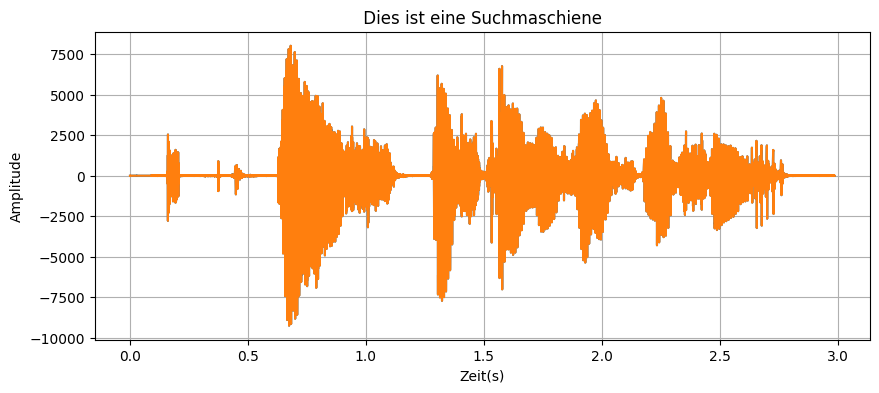

In [144]:
#Laden der Audiodatei 
audio_path = 'suchmaschine.wav' #Pfad zur Audiodatei 
rate , signal = wavfile.read(audio_path) #Einlesen der Audiodatei 

#Zeitvektor 
t = np.arange(0, len(signal)) / rate 

# Ploten der Audiodatei 
plt.figure(figsize=(10,4))
plt.plot(t,signal)
plt.xlabel("Zeit(s)")
plt.ylabel("Amplitude")
plt.title(" Dies ist eine Suchmaschiene ")
plt.grid(True)
plt.show()

# Audio-Datei abspielen
ipd.Audio(audio_path)

#### Analyse 
Anhand der Ausschläge der Grafik kann man die Einzelnen Wörter und Pausen des Satzes erkennen und sogar in unseren Fall das Hintergrundgeräusch am Anfang der Aufnahme. Man erkennt im ersten Großen Block das Wort "Dies" ganz deutlich und auch die Lautstärke der Stimme, die im Laufe des Satzes abnimmt erkennt man dadurch das die Ausschläge nicht so groß sind wie am Anfang. Ebenfalls kann man die einzelnen Silben des Satzes Sehen. 

## Generieren Sie jetzt ein harmonisches Signal bestehend aus dem Kammerton (𝑓0=440Hz) und seiner 2. und 3. Harmonischen. 

- Die Amplitude a und die Zeitdauer 𝑡𝑑 seien gegeben durch:  a= 1.0 und  𝑡𝑑=1s. 
- Tasten Sie das erstellte Signal mit einer Abtastfrequenz fa = 20 ∗ f0 ab und speichern Sie es in einer wave-Audiodatei ab. 
- Plotten Sie das resultierende Oszillogramm und den Kammerton. 
- Lesen Sie die Audio-Datei ein und geben Sie den Klang aus. 

#### Parameterdefinition 
-	`a` (Amplitude): Dies ist die maximale Auslenkung der Schwingung eines Signals. Eine Amplitude von 1.0 bedeutet, dass die Schwingung zwischen -1.0 und 1.0 oszilliert. 
-	`td` (Zeitdauer): Die Dauer des generierten Signals in Sekunden.
-	`f0` (Grundfrequenz): Die Grundfrequenz des Tons, die in Hertz (Hz) angegeben wird. Sie bestimmt die Tonhöhe des erzeugten Signals. Ein Wert von 440 Hz entspricht dem Kammerton A.
-	`fa` (Abtastfrequenz): Die Frequenz, mit der das Signal abgetastet wird. Sie ist hier 20-mal die Grundfrequenz, um eine hohe Abtastrate und damit eine genaue Darstellung des Signals zu gewährleisten. Abtastfrequenz muss gemäß dem Nyquist-Shannon-Abtasttheorem mindestens doppelt so hoch wie die höchste Frequenzkomponente des Signals sein, um Aliasing zu vermeiden.

#### Zeitvektor 
`t = np.linspace(0, td, int(td * fa), endpoint=False)`
Der Zeitvektor wird mit `np.linspace` erstellt, um sicherzustellen, dass die Abtastpunkte gleichmäßig über die gewünschte Dauer verteilt sind. Es erzeugt einen gleichmäßig verteilten Vektor von Zeitpunkten von 0 bis `td` Sekunden.   Die Anzahl der Punkte ist das Produkt aus `td` und `fa`, was sicherstellt, dass die Abtastrate `fa` eingehalten wird. `endpoint=False` bedeutet, dass der Endwert `td` nicht eingeschlossen ist.

#### Generierung der Harmonischen 
`def harmonic_generator(k , t):`

`     return a * np.sin(2 * np.pi * k * f0 * t)` 

Diese Funktion generiert die k-te harmonische Schwingung basierend auf der Grundfrequenz `f0`.
-	`k`: Der Harmonische-Index. `k=1` bedeutet die Grundfrequenz, `k=2` die erste Obertonfrequenz usw.
-	`t`: Der Zeitvektor.
-	`Rückgabewert`: Ein Array, das die Amplitudenwerte der k-ten harmonischen Schwingung für jeden Zeitpunkt `t` enthält. Also unseren Fertigen Ton 

Eine harmonische Schwingung wird mit der Sinusfunktion generiert. Die Formel zur Generierung der harmonischen Schwingung lautet:
`y(t)=a*sin⁡(2*π*k*f_0*t)`
 wobei:  `a` die Amplitude ist, `k` der Harmonische-Index ist, `f_0` die Grundfrequenz ist und `t` die Zeit ist. Der Faktor 
`(2*π*k*f_0*t)`
stellt sicher, dass die Frequenz der Schwingung ein ganzzahliges Vielfaches der Grundfrequenz ist, was die Definition von Harmonischen erfüllt.



 

In [145]:
# Parameter
a = 1.0  # Amplitude
td = 1.0  # Zeitdauer in Sekunden
f0 = 440  # Grundfrequenz in Hz
fa = 20 * f0  # Abtastfrequenz in Hz

# Zeitvektor
t = np.linspace(0, td, int(td * fa), endpoint=False)

#Generierung der Harmonischen 
def harmonic_generator(k , t ):
    return a * np.sin(2 * np.pi * k * f0 * t)


#### Generierung des Kammertons und der Harmonischen 
`chambertone`: Dies ist das generierte Signal des Kammertons, das nur die Grundfrequenz enthält. Hier wird die Funktion `harmonic_generator` mit dem Harmonischen-Index `k=1` und dem Zeitvektor `t` aufgerufen, um die Grundfrequenz zu erzeugen.
`y(t)=a*sin⁡(2*π*1*f_0*t)`
    wobei `f_0` die Grundfrequenz (440 Hz) und `a` die Amplitude (1.0) ist.

`secound_harmonic `: Ist die generierte zweite Harmonische des Grundtons mit 440Hz. Hier wird die Funktion `harmonic_generator` mit dem Harmonischen-Index `k=2` und dem Zeitvektor `t` aufgerufen, um die Grundfrequenz zu erzeugen.
`y(t)=a*sin⁡(2*π*2*f_0*t)`

`third_harmonic `: Ist die generierte dritte Harmonische des Grundtons mit 440Hz. Hier wird die Funktion `harmonic_generator` mit dem Harmonischen-Index `k=3` und dem Zeitvektor `t` aufgerufen, um die Grundfrequenz zu erzeugen.
`y(t)=a*sin⁡(2*π*3*f_0*t)`

#### Visualisierung(Plotten)
Hierfür wurde das `pyplot` Modul mit der Abkürzung `plt` verwendet. 
Dies ermöglicht eine visuelle Inspektion der Schwingungen der erzeugten Töne.

#### Abspielen der Töne 
Hierfür wird `IPython.display` verwendet mit der Abkürzung `ipd`. 

`print("Klang des Kammertons")`

`ipd.display(ipd.Audio(chambertone, rate=fa))`

Hierbei dient der `Print()` Befehl einer Textmeldung als Ausgabe, die anzeigt, um welchen Ton es sich handelt und dient nur der Verschönerung der Ausgabe. 
`ipd.display(ipd.Audio())` Diese Funktion lädt das generierte Audioarray und stellt eine Audioausgabe im Jupyter-Notebook bereit. Der Parameter `rate=fa` gibt die Abtastrate an, die beim Abspielen verwendet wird. Diese Methode wird statt nur dem `ipd.Audio()`verwendet da wir somit keine vorherige Speicherung des Tons benötigen und wir somit viele unnötige Dateien verhindern. 
In derselben Art werden auch die anderen Dateien ausgegeben.



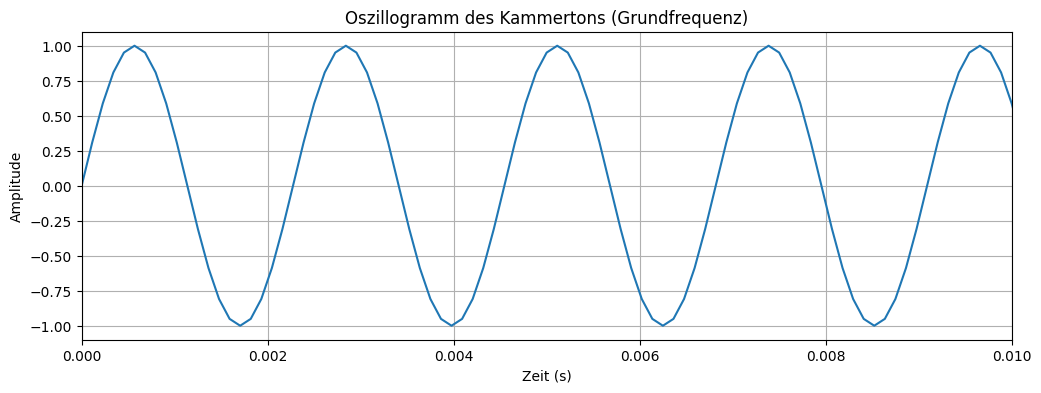

Klang des Kammertons


In [146]:
# Generierung des Kammertons
chambertone = harmonic_generator(1, t)

# Plot des Kammertons (nur die Grundfrequenz)
plt.figure(figsize=(12, 4))
plt.plot(t, chambertone)
plt.xlim(0,0.01)
plt.title('Oszillogramm des Kammertons (Grundfrequenz)')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Abspielen des Kammertons 
print("Klang des Kammertons")
ipd.display(ipd.Audio(chambertone, rate=fa))


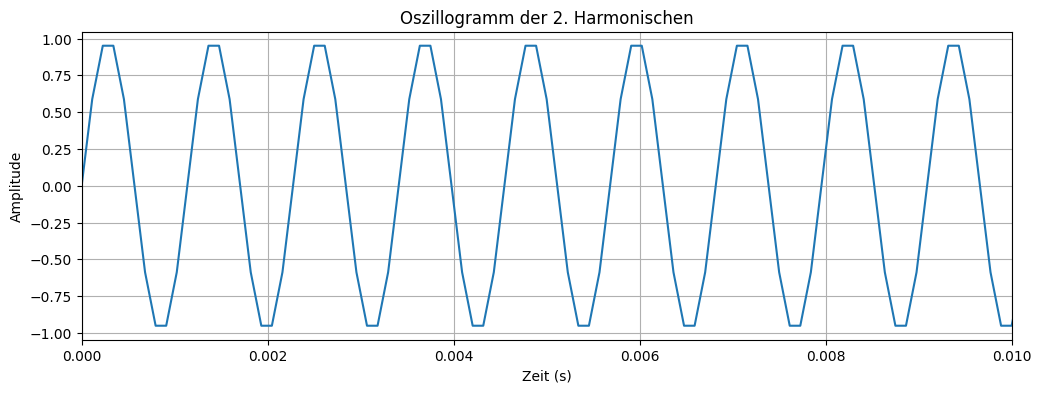

Klang der 2.Harmonischen


In [147]:
# Generierung der 2. Harmonischen
second_harmonic = harmonic_generator(2 , t )

# Plot der 2. Harmonischen
plt.figure(figsize=(12, 4))
plt.plot(t, second_harmonic)
plt.xlim(0,0.01)
plt.title('Oszillogramm der 2. Harmonischen')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Abspielen der 2. Harmonischen 
print("Klang der 2.Harmonischen")
ipd.display(ipd.Audio(second_harmonic, rate=fa))


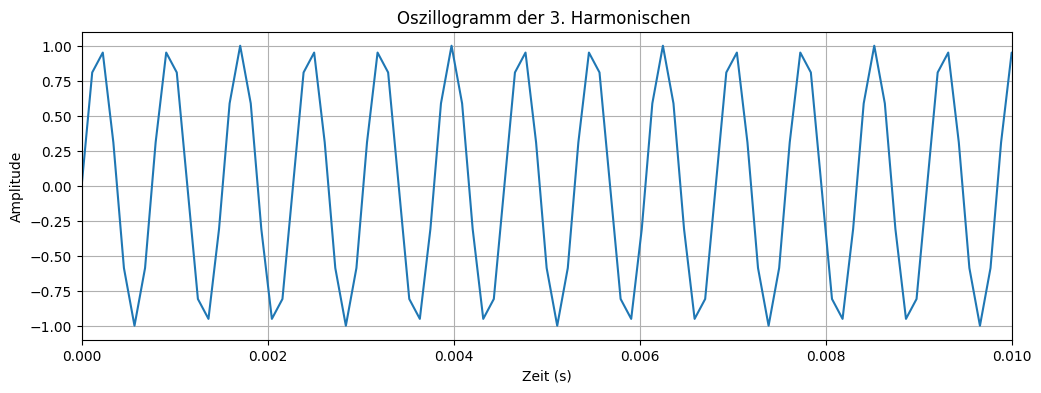

Klang der 3.Harmonischen


In [148]:
# Generierung der 3. Harmonischen
third_harmonic = harmonic_generator(3 , t)

# Plot der 3. Harmonischen
plt.figure(figsize=(12, 4))
plt.plot(t, third_harmonic)
plt.xlim(0,0.01)
plt.title('Oszillogramm der 3. Harmonischen ')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Abspielen der 3.Harmonischen 
print("Klang der 3.Harmonischen")
ipd.display(ipd.Audio(third_harmonic, rate=fa))


#### Summierung der harmonischen Signale
`combined_signal`: Dies ist das resultierende Signal, das durch die Summierung des Kammertons (Grundfrequenz) und der zweiten und dritten Harmonischen entsteht. Die Addition der Signale erfolgt durch die punktweise Addition der Amplitudenwerte: 

`combined_signal = chambertone + second_harmonic + third_harmonic`

Dies erzeugt ein komplexes Signal, das die Frequenzkomponenten der Grundfrequenz sowie der zweiten und dritten Harmonischen enthält.

#### Speichern des Signals in einer Wave-Datei
`wavfile.write('harmonisches_signal.wav', fa, combined_signal.astype(np.float32))`

Die Funktion speichert das kombinierte Signal in einer WAV-Datei. Die Parameter sind:
-	`'harmonisches_signal.wav'`: Der Dateiname der zu speichernden WAV-Datei
-	`fa`: Die Abtastrate, die beim Speichern verwendet wird
-	`combined_signal.astype(np.float32)`: Das kombinierte Signal wird in das `float32`-Format konvertiert, um die erforderliche Präzision für Audiodaten zu gewährleisten.

#### Visualisierung(Plotten)
Der Plot zeigt das Oszillogramm des kombinierten Signals zusammen mit den einzelnen harmonischen Komponenten. Dies ermöglicht eine visuelle Inspektion, wie die Harmonischen zum Gesamtton beitragen.

#### Abspielen des Tons 
`ipd.Audio('harmonisches_signal.wav')` 
hier wird `ipd.Audio()`verwendet da die Datei laut Aufgabenstellung gespeichert werden soll. 




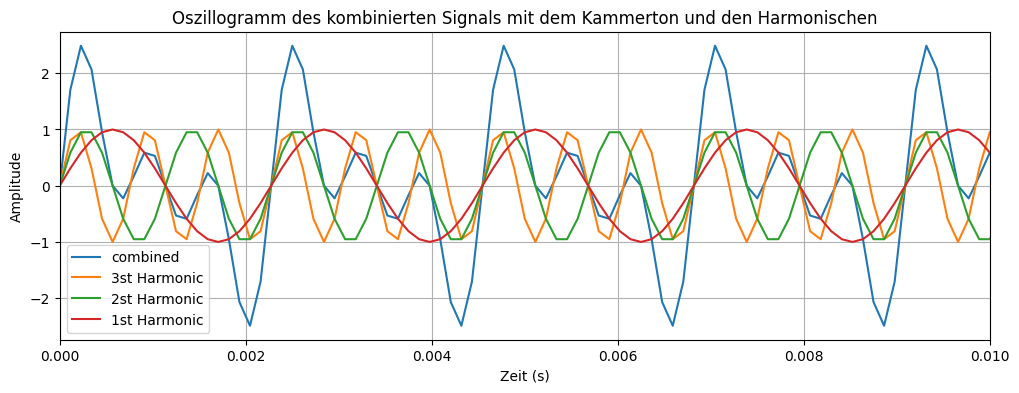

Klang des combinierten Signals


In [149]:
# Summierung der harmonischen Signale
combined_signal = chambertone + second_harmonic + third_harmonic

# Speichern des Signals in einer Wave-Datei
wavfile.write('harmonisches_signal.wav', fa, combined_signal.astype(np.float32))

# Plot des Oszillogramms des kombinierten Signals mit den Kammerton und den Harmonischen
plt.figure(figsize=(12, 4))
plt.plot(t, combined_signal, label="combined")
plt.plot(t, third_harmonic, label="3st Harmonic")
plt.plot(t, second_harmonic, label="2st Harmonic")
plt.plot(t, chambertone, label="1st Harmonic")
plt.xlim(0,0.01)
plt.title('Oszillogramm des kombinierten Signals mit dem Kammerton und den Harmonischen')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

# Audio-Datei einlesen und abspielen
print("Klang des combinierten Signals")
ipd.Audio('harmonisches_signal.wav')


## Verändern Sie jetzt die Phase der drei Einzeltöne mit einer Zufallsfunktion und plotten Sie den Klang als Zeitfunktion und geben das Audiosignal aus. 

- Verändert sich der Klang sichtbar und hörbar?

#### Zufällige Phasenverschiebung für jede Schwingung generieren
 `phase_shifts = np.random.uniform(0, 2*np.pi, 3) `

Ein Array, das drei zufällige Phasenverschiebungen zwischen 0 und 2π enthält. Diese Phasenverschiebungen werden unabhängig für jede harmonische Schwingung generiert und zufällig gewählt. 

- `phase_shifts`: Ein Array, das drei zufällige Phasenverschiebungen zwischen 0 und 2π  enthält. Diese Phasenverschiebungen werden unabhängig für jede harmonische Schwingung generiert.

- `np.random.uniform(0, 2*np.pi, 3)`: Erzeugt drei Zufallszahlen, die gleichmäßig zwischen 0 und 2π verteilt sind.

Eine Phasenverschiebung verändert den Zeitpunkt, zu dem die Sinuswelle beginnt. Die Formel zur Generierung der harmonischen Schwingung mit Phasenverschiebung lautet:
 `y(t)=a*sin⁡(2*π*k*f_0 (t+∅)) `
wobei  `∅ ` die zufällige Phasenverschiebung ist.

 `chambertone_random_phase = harmonic_generator(1,  t+ phase_shifts[0]) `

 `second_harmonic_random_phase = harmonic_generator(2,  t + phase_shifts[1]) `

 `third_harmonic_random_phase = harmonic_generator(3, t + phase_shifts[2]) `

Die Funktion `harmonic_generator` wird aufgerufen, wobei der Zeitvektor `t` um die jeweilige zufällige Phasenverschiebung verschoben wird. Dies führt zu einem Phasenverschobenen Signal. Dadurch wird das Signal wie folgt berechnet: 
 `y(t+∅)=a*sin⁡(2*π*k*f_0 (t+∅)) `
wobei  `∅ ` die zufällige Phasenverschiebung ist. 
Dies führt dazu, dass das Signal entlang der Zeitachse verschoben wird, was zu einer veränderten Wellenform und Klangfarbe führt.


In [150]:
# Zufällige Phasenverschiebung für jede Schwingung generieren
phase_shifts = np.random.uniform(0, 2*np.pi, 3) 

# Signal mit zufälliger Phasenverschiebung erzeugen
chambertone_random_phase = harmonic_generator(1,  t+ phase_shifts[0])
second_harmonic_random_phase = harmonic_generator(2,  t + phase_shifts[1])
third_harmonic_random_phase = harmonic_generator(3, t + phase_shifts[2])


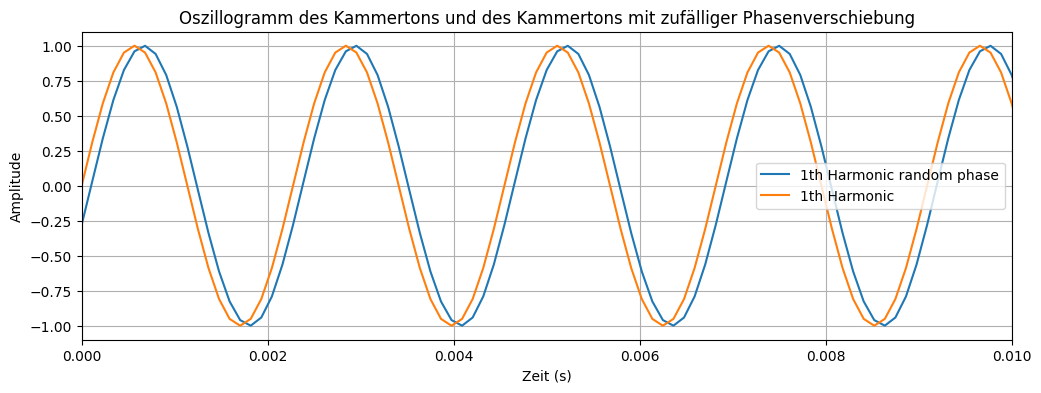

Klang des Kammertons mit zufälliger Verschiebung


Klang des Kammertons


In [151]:
# Plot des Oszillogramms des Signals mit zufälliger Phasenverschiebung
plt.figure(figsize=(12, 4))
plt.plot(t, chambertone_random_phase, label="1th Harmonic random phase")
plt.plot(t, chambertone, label="1th Harmonic")
plt.xlim(0,0.01)
plt.title('Oszillogramm des Kammertons und des Kammertons mit zufälliger Phasenverschiebung')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Abspielen des Kammertons mit zufälliger Verschiebung  
print("Klang des Kammertons mit zufälliger Verschiebung")
ipd.display(ipd.Audio(chambertone_random_phase, rate=fa))


# Abspielen des Kammertons 
print("Klang des Kammertons")
ipd.display(ipd.Audio(chambertone, rate=fa))


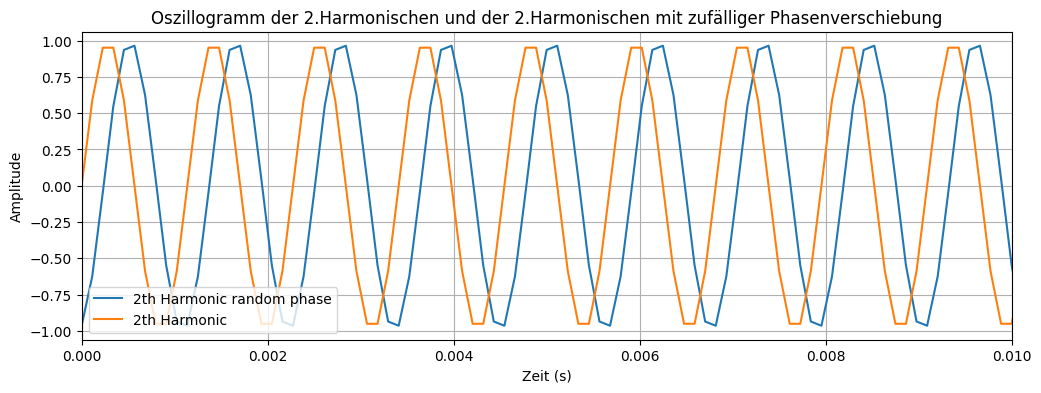

Klang der 2.Harmonischen mit zufälliger Phasenverschiebung


Klang der 2.Harmonischen


In [152]:

# Plot des Oszillogramms des Signals mit zufälliger Phasenverschiebung
plt.figure(figsize=(12, 4))
plt.plot(t, second_harmonic_random_phase, label="2th Harmonic random phase")
plt.plot(t, second_harmonic, label="2th Harmonic")
plt.xlim(0,0.01)
plt.title('Oszillogramm der 2.Harmonischen und der 2.Harmonischen mit zufälliger Phasenverschiebung')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Abspielen der 2.Harmonischen mit zufälliger Phasenverschiebung   
print("Klang der 2.Harmonischen mit zufälliger Phasenverschiebung")
ipd.display(ipd.Audio(second_harmonic_random_phase, rate=fa))


# Abspielen der 2.Harmonischen  
print("Klang der 2.Harmonischen")
ipd.display(ipd.Audio(second_harmonic, rate=fa))

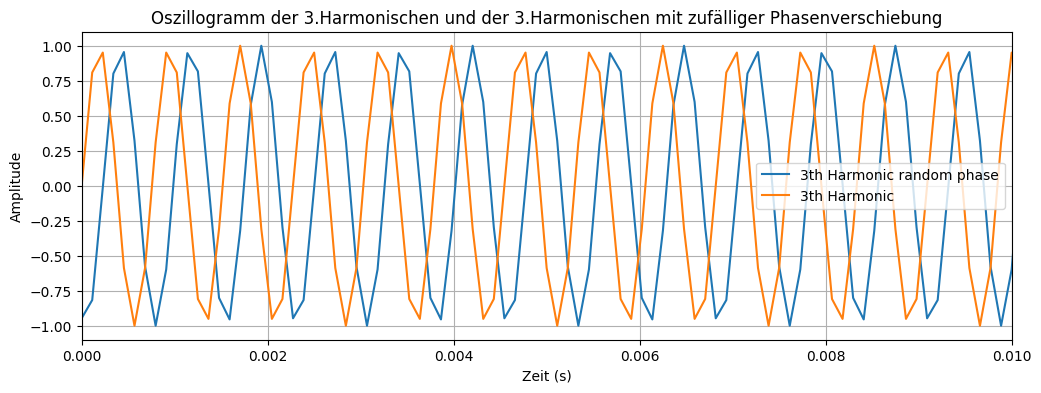

Klang der 3.Harmonischen mit zufälliger Phasenverschiebung


Klang der 3.Harmonischen


In [153]:

# Plot des Oszillogramms des Signals mit zufälliger Phasenverschiebung
plt.figure(figsize=(12, 4))
plt.plot(t, third_harmonic_random_phase, label="3th Harmonic random phase")
plt.plot(t, third_harmonic, label="3th Harmonic")
plt.xlim(0,0.01)
plt.title('Oszillogramm der 3.Harmonischen und der 3.Harmonischen mit zufälliger Phasenverschiebung')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Abspielen der 3.Harmonischen mit zufälliger Phasenverschiebung   
print("Klang der 3.Harmonischen mit zufälliger Phasenverschiebung")
ipd.display(ipd.Audio(third_harmonic_random_phase, rate=fa))


# Abspielen der 3.Harmonischen  
print("Klang der 3.Harmonischen")
ipd.display(ipd.Audio(third_harmonic, rate=fa))

#### Kombiniertes Signal mit zufälliger Phasenverschiebung erstellen
`combined_signal_random_phase = chambertone_random_phase + second_harmonic_random_phase + third_harmonic_random_phase	`

Dies ist das resultierende Signal, das durch die Summierung des Kammertons mit zufälliger Phasenverschiebung und der zweiten und dritten Harmonischen ebenfalls mit zufälliger Phasenverschiebung entsteht. Die Addition der Signale erfolgt durch die punktweise Addition der Amplitudenwerte. 



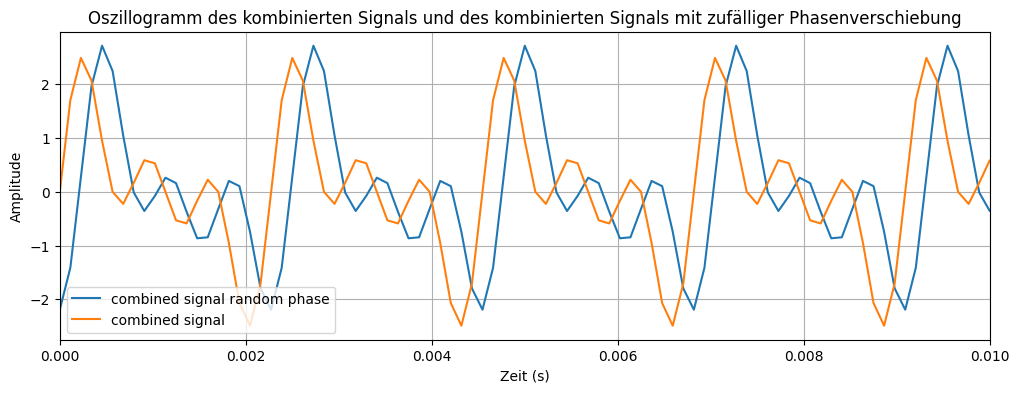

Klang des combinierten Signals mit zufälliger Phasenverschiebung


Klang des combinierten Signals


In [154]:
# Kombiniertes Signal mit zufälliger Phasenverschiebung erstellen
combined_signal_random_phase = chambertone_random_phase + second_harmonic_random_phase + third_harmonic_random_phase

# Speichern des Signals mit zufälliger Phasenverschiebung in einer Wave-Datei
wavfile.write('harmonisches_signal_random_phase.wav', fa, combined_signal_random_phase.astype(np.float32))

# Plot des Oszillogramms des kombinierten Signals mit zufälliger Phasenverschiebung
plt.figure(figsize=(12, 4))
plt.plot(t, combined_signal_random_phase, label="combined signal random phase")
plt.plot(t, combined_signal, label="combined signal")
plt.xlim(0,0.01)
plt.title('Oszillogramm des kombinierten Signals und des kombinierten Signals mit zufälliger Phasenverschiebung')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

# Abspielen des combinierten Signals zufälliger Phasenverschiebung   
print("Klang des combinierten Signals mit zufälliger Phasenverschiebung")
ipd.display(ipd.Audio(combined_signal_random_phase, rate=fa))


# Abspielen des combinierten Signals  
print("Klang des combinierten Signals")
ipd.display(ipd.Audio(combined_signal, rate=fa))


#### Analyse 
Die verschiebung der Phase kann man Deutlich im Oszillogramm sehen jedoch ist für uns der Unterschied nicht deutlich hörbar. 

## Mit welchem Schallsignal können sie den Kammerton komplett auslöschen. 

- Generieren Sie in ihrem Programm das resultierende Signal und plotten und spielen Sie dieses ab.

#### Generierung des Signals zur Auslöschung des Kammertons
`phase_shift = np.pi`

`canceling_signal = a * np.sin(2 * np.pi * f0 * t + phase_shift)`

- `phase_shift`: Eine Phasenverschiebung um π (180 Grad). Dies führt zu einem Signal, das genau entgegengesetzt zur ursprünglichen Welle ist.
- `canceling_signal`: Das erzeugte Signal zur Auslöschung des Kammertons. Es hat die gleiche Frequenz und Amplitude wie der Kammerton, jedoch eine Phasenverschiebung von π.

Eine Phasenverschiebung um π (180 Grad) bedeutet, dass das Signal um eine halbe Periode verschoben wird. Dadurch wird jede positive Amplitude in eine negative umgewandelt und umgekehrt.
Das ursprüngliche Signal und das Auslöschungssignal werden wie folgt kombiniert:

`y_combined (t)=y(t)+y(t-π)`

Da `y(t+π)= -y(t)` gilt ergibt sich: 

`y_combined (t)=y(t)-y(t)=0`

Die destruktive Interferenz tritt auf, wenn zwei Wellen gleicher Frequenz und Amplitude, aber entgegengesetzter Phase sich überlagern. Die resultierende Welle hat eine Amplitude von null, was zur Auslöschung des Signals führt.


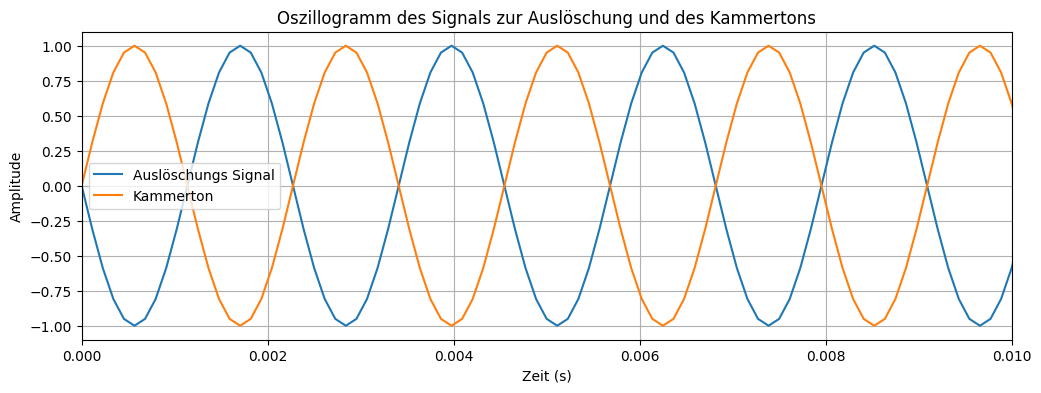

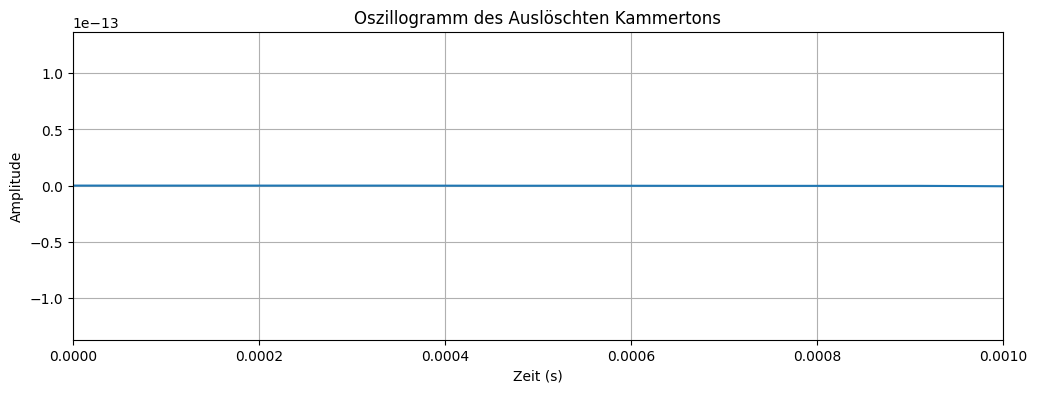

Klang des Kammertons


Klang des Auslöschungstons 


Klang des ausgelöschten Kammertons


In [155]:
# Generierung des Signals zur Auslöschung des Kammertons
phase_shift = np.pi  # Phasenverschiebung um pi
canceling_signal = a * np.sin(2 * np.pi * f0 * t + phase_shift)

# Plot des Oszillogramms des Signals zur Auslöschung des Kammertons
plt.figure(figsize=(12, 4))
plt.plot(t, canceling_signal, label="Auslöschungs Signal")
plt.plot(t, chambertone, label="Kammerton")
plt.xlim(0,0.01)
plt.title('Oszillogramm des Signals zur Auslöschung und des Kammertons')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()


chambertone_canceling_signal = chambertone + canceling_signal 

# Speichern des Signals in einer Wave-Datei
wavfile.write('kammerton_ausgeloescht.wav', fa, chambertone_canceling_signal.astype(np.float32))

# Plot des Oszillogramms des Signals zur Auslöschung des Kammertons
plt.figure(figsize=(12, 4))
plt.plot(t, chambertone_canceling_signal)
plt.xlim(0,0.001)
plt.title('Oszillogramm des Auslöschten Kammertons')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Abspielen des Kammertons 
print("Klang des Kammertons")
ipd.display(ipd.Audio(chambertone, rate=fa))

# Abspielen des Auslöschungstons  
print("Klang des Auslöschungstons ")
ipd.display(ipd.Audio(canceling_signal, rate=fa))

# Abspielen des ausgelöschten Kammertons 
print("Klang des ausgelöschten Kammertons")
ipd.Audio('kammerton_ausgeloescht.wav')


## Erstellen Sie ein Programm zur Modellierung einer periodische Rechteckfunktion (f0 =1Hz, Breite=0.5s, fa =8kHz) durch Überlagerung aus seinen ersten 9 harmonischen Komponenten.  

- Plotten Sie die so erzeugte Rechteckfunktion und zusätzlich  die 1. Harmonische und die 9. Harmonische. 
- Erklären und beschreiben Sie den Zusammenhang zwischen den 3 Funktionen. 

#### Parameterdefinition
- `f0` (Grundfrequenz): Die Grundfrequenz der Rechteckfunktion in Hertz.
- `T0` (Periodendauer): Die Dauer einer Periode der Rechteckfunktion.
- `width`: Die Breite des Rechteckimpulses in Sekunden.
- `fa` (Abtastfrequenz): Die Abtastrate in Hertz.
- `t` : Zeitvektor über zwei Perioden der Rechteckfunktion, mit einer Abtastrate von `fa`.
Rechteckfunktion erzeugen

`rect = np.zeros_like(t)`

`rect[(t % T0) < breite] = 1`

- `rect`: Ein Array zur Speicherung der Rechteckfunktion. Das Array ist zu Beginn mit Nullen gefüllt.
- `rect[(t % T0) < breite] = 1`: Setzt die Werte des Arrays auf 1, wenn die Bedingung `(t % T0) < breite` erfüllt ist. Dies erzeugt die Rechteckfunktion.

#### Fourier-Koeffizienten und Überlagerung der harmonischen Komponenten
`def fourier_rechteck(t, f0, N):`

`result = 0.5  # DC-Komponente`

    `for k in range(1, N+1):`

        `if k % 2 != 0:`

            `result += (2 / (k * np.pi)) * np.sin(2 * np.pi * k * f0 * t)`

    `return result`

- `fourier_rechteck(t, f0, N)`: Diese Funktion berechnet die Fourier-Reihenentwicklung der Rechteckfunktion.
- `result = 0.5`: Initialisiert das Ergebnis mit der DC-Komponente.
- `for-Schleife`: Addiert die ungeraden harmonischen Komponenten zur Rechteckfunktion.
- `(2 / (k * np.pi)) \* np.sin(2 \* np.pi \* k \* f0 \* t)`: Berechnet die k-te ungerade harmonische Komponente.
Die Funktion startet mit der DC-Komponente (`result = 0.5`). Die Schleife durchläuft alle ungeraden harmonischen Komponenten `(1, 3, 5, ..., N)` und addiert diese zur Approximation der Rechteckfunktion durch eine endliche Summe von Sinuswellen, die harmonischen Komponenten. Jede dieser Komponenten trägt zur Form der Rechteckfunktion bei. Die Fourier-Reihenentwicklung ist eine Methode, um periodische Signale wie die Rechteckfunktion in ihre Grundfrequenz und Obertöne zu zerlegen.

Eine Rechteckfunktion kann als unendliche Summe ihrer ungeraden harmonischen Sinuswellen dargestellt werden. Die Fourier-Reihe der Rechteckfunktion lautet:

`Rechteck(t)=0.5+∑_(k=1,3,5,…)^N▒〖2/k*π*sin⁡(2*π*k*f_0*t )〗`

`rect_approx = fourier_rechteck(t, f0, N)`

- ` rect_approx`: ist die generierte Rechtecksfunktion basierend auf die `fourier_rechteck()`Funktion.

#### 1. und 9. harmonische Komponente

` def harmonische_komponente(t, f0, k):` 

    ` return (2 / (k * np.pi)) * np.sin(2 * np.pi * k * f0 * t)` 

Die erste und neunte Harmonische werden erzeug durch:

` n.Harmonische(t)=2/π*sin⁡(2*π*f_o*t) ` 

mit dem Harmonischen-Index `k=1 bzw. 9` und dem Zeitvektor `t` aufgerufen, um die Grundfrequenz zu erzeugen. 


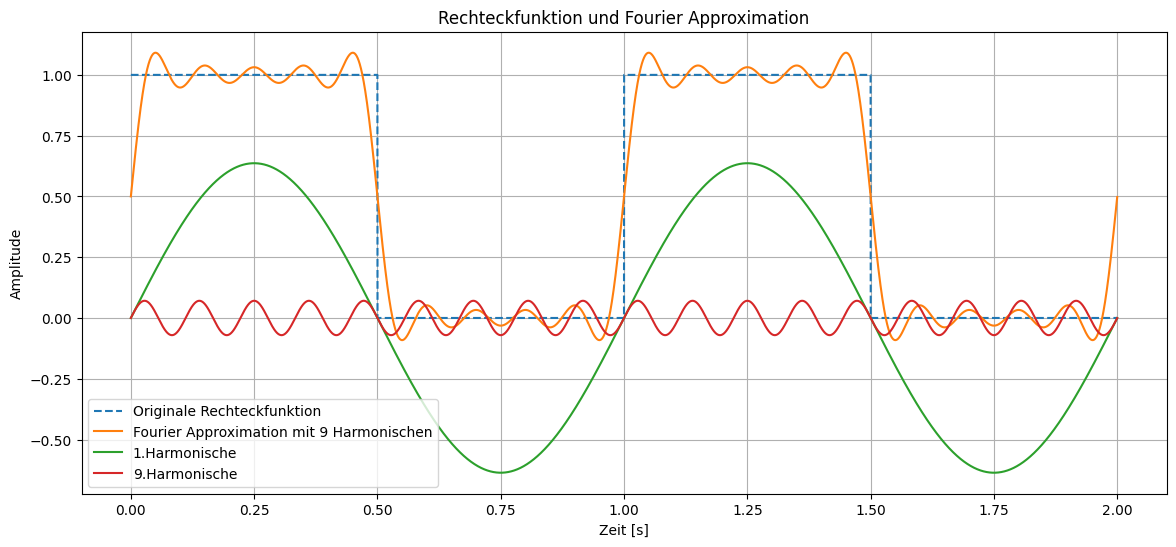

Klang der Rechtecksfunktion 


Klang der 1.Harmonischen 


Klang der 9.Harmonischen 


In [157]:

# Parameter
f0 = 1  # Grundfrequenz in Hz
T0 = 1 / f0  # Periodendauer in Sekunden
width = 0.5  # Breite des Rechteckimpulses in Sekunden
fa = 8000  # Abtastfrequenz in Hz
t = np.arange(0, 2*T0, 1/fa)  # Zeitvektor über zwei Perioden
N = 9  # Anzahl der harmonischen Komponenten

# Rechteckfunktion erzeugen
rect = np.zeros_like(t)
rect[(t % T0) < width] = 1

# Fourier-Koeffizienten und Überlagerung der harmonischen Komponenten
def fourier_rechteck(t, f0, N):
    result = 0.5  # DC-Komponente
    for k in range(1, N+1):
        if k % 2 != 0:  # Nur ungerade harmonische Komponenten
            result += (2 / (k * np.pi)) * np.sin(2 * np.pi * k * f0 * t)
    return result

# 1. und 9. harmonische Komponente
def harmonische_komponente(t, f0, k):
    return (2 / (k * np.pi)) * np.sin(2 * np.pi * k * f0 * t)

# Generierung der Rechteckfunktion durch Überlagerung der ersten 9 harmonischen Komponenten
rect_approx = fourier_rechteck(t, f0, N)
harmonic_1 = harmonische_komponente(t, f0, 1)
harmonic_9 = harmonische_komponente(t, f0, 9)

# Plotten der Ergebnisse
plt.figure(figsize=(14, 6))
plt.plot(t, rect, label='Originale Rechteckfunktion', linestyle='--')
plt.plot(t, rect_approx, label='Fourier Approximation mit 9 Harmonischen')
plt.plot(t, harmonic_1, label='1.Harmonische')
plt.plot(t, harmonic_9, label='9.Harmonische')
plt.xlabel('Zeit [s]')
plt.ylabel('Amplitude')
plt.title('Rechteckfunktion und Fourier Approximation')
plt.legend()
plt.grid()
plt.show()

# Abspielen der Rechtecksfunktion  
print("Klang der Rechtecksfunktion ")
ipd.display(ipd.Audio(rect_approx, rate=fa))

# Abspielen der 1.Harmonischen 
print("Klang der 1.Harmonischen ")
ipd.display(ipd.Audio(harmonic_1, rate=fa))

# Abspielen der 9.Harmonischen 
print("Klang der 9.Harmonischen ")
ipd.display(ipd.Audio(harmonic_9, rate=fa))


#### Analyse 
Zusammenhang der Funktionen ? 

## Wie klingt eine periodische Rechteckfunktion mit 𝑓0 =440Hz? 

- Vergleichen Sie den Klang mit einem reinen sinus-Ton 𝑓0 =440Hz?

#### Parameterdefinition
- `f0` (Grundfrequenz): Die Frequenz des erzeugten Tons in Hertz. Ein Wert von 440 Hz entspricht dem Kammerton A.
- `duration` (Dauer): Die Dauer des Tons in Sekunden.
- `sampling_rate` (Abtastrate): Die Anzahl der Abtastwerte pro Sekunde. Eine Abtastrate von 44100 Hz ist Standard für Audio-CDs und sorgt für eine hohe Klangqualität.

#### Zeitvektor
`t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)`

`t` : Ein Vektor, der gleichmäßig verteilte Zeitpunkte von 0 bis zur angegebenen Dauer enthält, basierend auf der Abtastrate. `endpoint=False` bedeutet, dass der Endwert nicht eingeschlossen ist. erstellt, um sicherzustellen, dass die Abtastpunkte gleichmäßig über die gewünschte Dauer verteilt sind. 

#### Sinusfunktion
`sin_wave =  np.sin(2 * np.pi * f0 * t)`

`sin_wave`: Das erzeugte Sinussignal mit einer Frequenz von 440 Hz. Die Sinusfunktion wird mit der Formel `sin⁡(π*f_0*t)`berechnet.

`y(t)=sin⁡(2*π*f_0*t)`

#### Rechteckfunktion
`square_wave = np.sign(np.sin(2 * np.pi * f0 * t))`

`square_wave` : Das erzeugte Rechtecksignal mit einer Frequenz von 440 Hz. Die Rechteckfunktion wird durch Anwenden der Signum-Funktion (`sign`) auf die Sinusfunktion berechnet, was die Werte auf -1 oder 1 beschränkt.
`y(t)=sign(sin⁡(2*π*f_0*t))`





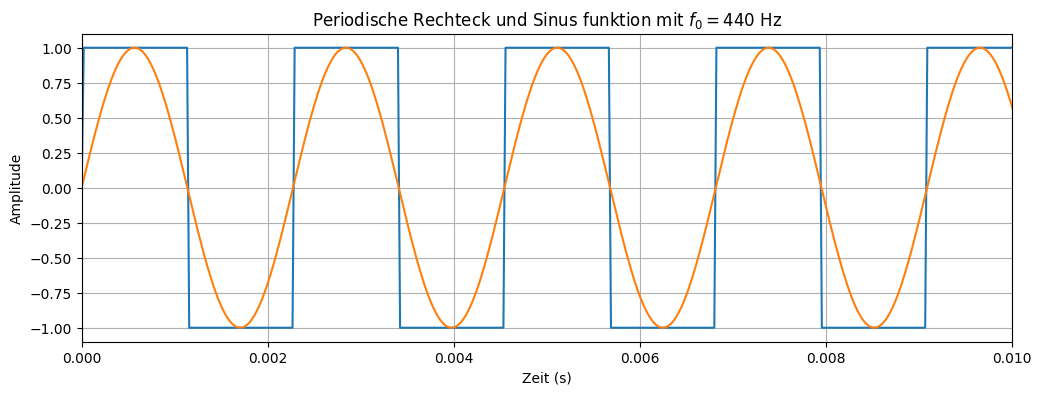

Klang der periodischen Rechteckfunktion:


Klang des reinen Sinustons:


In [158]:

# Parameter
f0 = 440  # Grundfrequenz in Hz
duration = 2  # Dauer des Tons in Sekunden
sampling_rate = 44100  # Abtastrate in Hz

# Zeitvektor
t = np.linspace(0, duration, int(sampling_rate * duration), endpoint=False)

# Sinusfunktion
sin_wave =  np.sin(2 * np.pi * f0 * t)

# Rechteckfunktion
square_wave = np.sign(np.sin(2 * np.pi * f0 * t))

# Plot der Rechteckfunktion
plt.figure(figsize=(12, 4))
plt.plot(t, square_wave)
plt.plot(t, sin_wave)
plt.xlim(0,0.01)
plt.title('Periodische Rechteck und Sinus funktion mit $f_0 = 440$ Hz')
plt.xlabel('Zeit (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

# Abspielen der periodischen Rechteckfunktion
print("Klang der periodischen Rechteckfunktion:")
ipd.display(ipd.Audio(square_wave, rate=sampling_rate))

# Abspielen des reinen Sinustons
print("Klang des reinen Sinustons:")
ipd.display(ipd.Audio(sin_wave, rate=sampling_rate))

#### Analyse 
Man kann Deutlich hören das die Rechtecksfunktion Lauter und Schärfer ist im gegensatz zum eher Leisen und Sampften Sinusfunktion 